source proj3_env/bin/activate

In the following blocks data from https://comtradeplus.un.org/TradeFlow?Frequency=A&Flows=X&CommodityCodes=TOTAL&Partners=0&Reporters=all&period=2024&AggregateBy=none&BreakdownMode=plus UN com Trade has been analysed. 

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [220]:
import seaborn as sns

In [221]:
df1 = pd.read_csv('/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/tariff_war/raw_data/UN_com_trade1.csv')
df2 = pd.read_csv('/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/tariff_war/raw_data/UN_com_trade2.csv')

In [222]:
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined = df_combined.drop_duplicates()
df_combined = df_combined.sort_values(by='refMonth')
df_combined.rename (columns = {'refMonth':'Year', 'fobvalue':'Trade_value_brazil_china'}, inplace = True)
df_combined

,typeCode,freqCode,refPeriodId,refYear,Year,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,Trade_value_brazil_china,primaryValue,legacyEstimationFlag,isReported,isAggregate
12,A,20020101,2002,52,2002,76,BRA,Brazil,X,Export,...,False,0,False,NaN,823446123,823446123,0,False,True,NaN
13,A,20030101,2003,52,2003,76,BRA,Brazil,X,Export,...,False,0,False,NaN,1313073236,1313073236,0,False,True,NaN
14,A,20040101,2004,52,2004,76,BRA,Brazil,X,Export,...,False,0,False,NaN,1621735722,1621735722,0,False,True,NaN
15,A,20050101,2005,52,2005,76,BRA,Brazil,X,Export,...,False,0,False,NaN,1710492943,1710492943,0,False,True,NaN
16,A,20060101,2006,52,2006,76,BRA,Brazil,X,Export,...,False,0,False,NaN,2428650146,2428650146,0,False,True,NaN
17,A,20070101,2007,52,2007,76,BRA,Brazil,X,Export,...,False,0,False,NaN,2831860767,2831860767,0,False,True,NaN
18,A,20080101,2008,52,2008,76,BRA,Brazil,X,Export,...,False,0,False,NaN,5324052177,5324052177,0,False,True,NaN
19,A,20090101,2009,52,2009,76,BRA,Brazil,X,Export,...,False,0,False,NaN,6342964920,6342964920,0,False,True,NaN
20,A,20100101,2010,52,2010,76,BRA,Brazil,X,Export,...,False,0,False,NaN,7133440544,7133440544,0,False,True,NaN
21,A,20110101,2011,52,2011,76,BRA,Brazil,X,Export,...,False,0,False,NaN,10951902030,10951902030,0,False,True,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

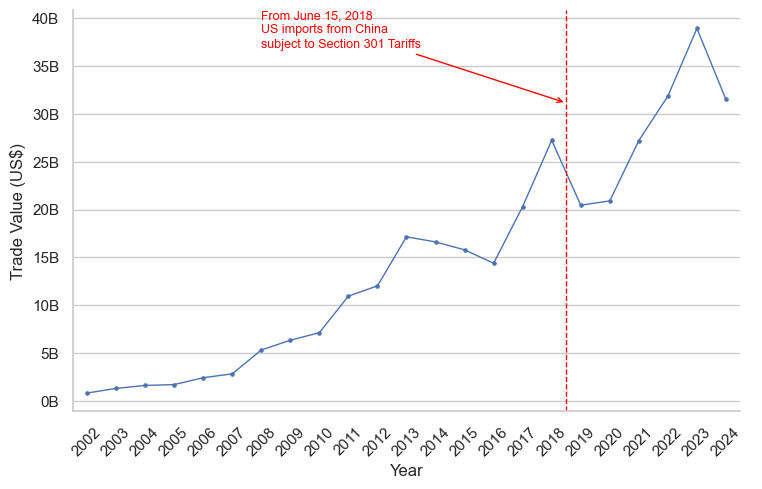

In [223]:
g = sns.catplot(data= df_combined, 
                x="Year", 
                y="Trade_value_brazil_china", 
                kind="point", 
                height = 5, 
                aspect = 1.5, 
                linewidth = 1, 
                markers = 'o'
                )

#Format y-axis to show values in Billions
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{x/1e9:.0f}B'))

#rotating x-tick labels
g.set_xticklabels(rotation = 45)

#set axis labels
g.set(xlabel = 'Year', ylabel= 'Trade Value (US$)')

# Add vertical line for June 15, 2018 event (aligned with 2018 on x-axis)
g.ax.axvline(x=16.5, color='red', linestyle='--', linewidth=1)

# Add annotation
g.ax.annotate(
    "From June 15, 2018\nUS imports from China\nsubject to Section 301 Tariffs",
    xy=(16.5, df1['fobvalue'].max()*0.8),
    xytext=(6, df1['fobvalue'].max()*.95),
    arrowprops=dict(arrowstyle='->', color='red', lw=1),
    fontsize=9,
    color='red',
    ha='left'
)

#show plot
plt.tight_layout
plt.show

Following blocks represents the analysis of the FAO stat regarind the production of soya beans in Brazil from the year 2015-2023. 
link: https://www.fao.org/faostat/en/#compare

In [224]:
df_FAO = pd.read_csv('/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/tariff_war/raw_data/FAOSTAT_data_en_5-17-2025.csv')
df_FAO


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,1717,"Cereals, primary",1961,1961,ha,1.116864e+07,A,Official figure,NaN
1,QCL,Crops and livestock products,21,Brazil,5412,Yield,1717,"Cereals, primary",1961,1961,kg/ha,1.346300e+03,A,Official figure,NaN
2,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",1961,1961,t,1.503635e+07,A,Official figure,NaN
3,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,1717,"Cereals, primary",1962,1962,ha,1.152232e+07,A,Official figure,NaN
4,QCL,Crops and livestock products,21,Brazil,5412,Yield,1717,"Cereals, primary",1962,1962,kg/ha,1.381500e+03,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,QCL,Crops and livestock products,21,Brazil,5412,Yield,1717,"Cereals, primary",2022,2022,kg/ha,4.907400e+03,A,Official figure,NaN
185,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2022,2022,t,1.357428e+08,A,Official figure,NaN
186,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,1717,"Cereals, primary",2023,2023,ha,2.921087e+07,A,Official figure,NaN
187,QCL,Crops and livestock products,21,Brazil,5412,Yield,1717,"Cereals, primary",2023,2023,kg/ha,5.336300e+03,A,Official figure,NaN


In [225]:
df_FAO = df_FAO[df_FAO['Element']== 'Production']
df_FAO = df_FAO[df_FAO['Year']>=2002]
df_FAO.rename(columns = {'Value':'soy_production(ton)'}, inplace = True)
df_FAO

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,soy_production(ton),Flag,Flag Description,Note
125,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2002,2002,t,5.087559e+07,A,Official figure,NaN
128,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2003,2003,t,6.745433e+07,A,Official figure,NaN
131,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2004,2004,t,6.395336e+07,A,Official figure,NaN
134,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2005,2005,t,5.567092e+07,A,Official figure,NaN
137,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2006,2006,t,5.914898e+07,A,Official figure,NaN
140,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2007,2007,t,6.944163e+07,A,Official figure,NaN
143,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2008,2008,t,7.974547e+07,A,Official figure,NaN
146,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2009,2009,t,7.091479e+07,A,Official figure,NaN
149,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2010,2010,t,7.516015e+07,A,Official figure,NaN
152,QCL,Crops and livestock products,21,Brazil,5510,Production,1717,"Cereals, primary",2011,2011,t,7.758628e+07,A,Official figure,NaN


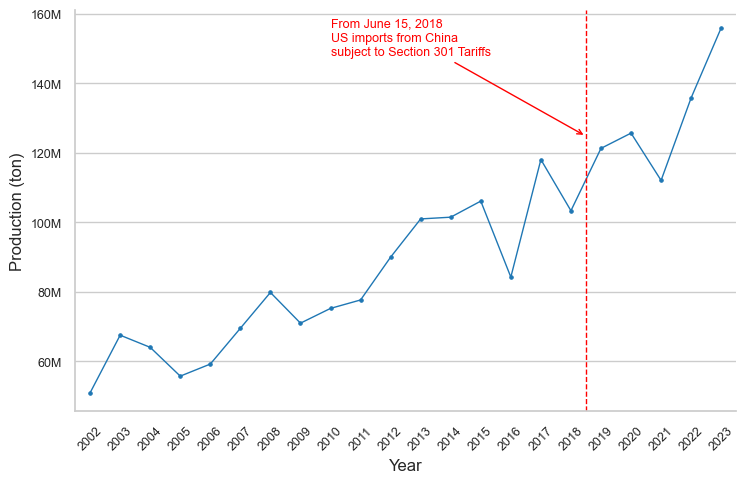

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the point plot
g_FAO = sns.catplot(
    data=df_FAO,
    x="Year",
    y="soy_production(ton)",
    kind="point",
    height=5,
    aspect=1.5,
    linewidth=1,
    markers='o',
    color="#1f77b4"  # Optional: consistent line color
)

# Format y-axis to millions
g_FAO.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Rotate x-tick labels
g_FAO.set_xticklabels(rotation=45, fontsize=9)
g_FAO.ax.tick_params(axis='y', labelsize=9)

# Axis labels
g_FAO.set(xlabel='Year', ylabel='Production (ton)')

# Titles and layout
# g_FAO.ax.set_title("Production Trend with Section 301 Tariff Event", fontsize=14, fontweight='bold', pad=20)

# Add vertical line for June 15, 2018 event (aligned with 2018 on x-axis)
g_FAO.ax.axvline(x=16.5, color='red', linestyle='--', linewidth=1)

# Add annotation
g_FAO.ax.annotate(
    "From June 15, 2018\nUS imports from China\nsubject to Section 301 Tariffs",
    xy=(16.5, df_FAO['soy_production(ton)'].max()*0.8),
    xytext=(8, df_FAO['soy_production(ton)'].max()*.95),
    arrowprops=dict(arrowstyle='->', color='red', lw=1),
    fontsize=9,
    color='red',
    ha='left'
)

# Tight layout and show
plt.tight_layout()
plt.show()

USDA data for export to china analysis: https://apps.fas.usda.gov/gats/default.aspx

In [227]:
# !pip install openpyxl

import pandas as pd

# Load the Excel file
df_usda = pd.read_excel('/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/tariff_war/raw_data/USDA_data.xlsx')

# Transpose the DataFrame
df_usda = df_usda.T.reset_index()

# Set the first row as header
df_usda.columns = df_usda.iloc[0]  # First row becomes header
df_usda = df_usda[1:]              # Drop the first row

# Rename the first column to 'Year'
df_usda = df_usda.rename(columns={df_usda.columns[0]: "Year"})

# Ensure 'Year' is not the index and is of type int
df_usda["Year"] = df_usda["Year"].astype(int)
df_usda = df_usda.reset_index(drop=True)

# Preview
print(df_usda.head())

0  Year Thousand Usd        MT
0  2002       995837   4861427
1  2003      2888772  11112116
2  2004      2328762   9402546
3  2005      2248983   9434308
4  2006      2531853  10320990


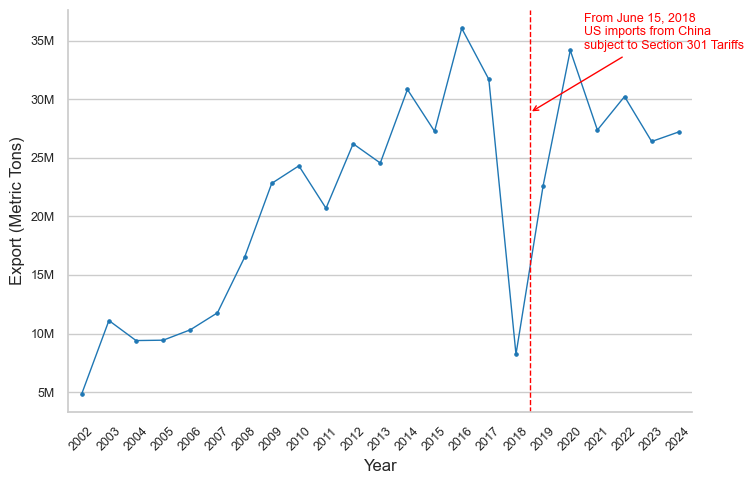

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # ✅ Required for y-axis formatting

# --- Load your dataset (ensure this is already done) ---
# df_usda = pd.read_csv("your_file.csv")  # or pd.read_excel(...)

# --- Clean and prepare ---
df_usda['Year'] = pd.to_numeric(df_usda['Year'], errors='coerce')
df_usda['MT'] = pd.to_numeric(df_usda['MT'], errors='coerce')
df_usda = df_usda.dropna(subset=['Year', 'MT'])  # Remove rows with missing values

# Sort by Year
df_usda = df_usda.sort_values(by='Year').reset_index(drop=True)

# Rename MT column
df_usda = df_usda.rename(columns={'MT': 'Export_Usa_china_MT'})

# Convert Year to string for categorical x-axis
df_usda['Year_str'] = df_usda['Year'].astype(int).astype(str)

# --- Create point plot ---
g_USDA = sns.catplot(
    data=df_usda,
    x='Year_str',
    y='Export_Usa_china_MT',
    kind='point',
    height=5,
    aspect=1.5,
    linewidth=1,
    markers='o',
    color="#1f77b4"
)

# Format y-axis to millions
g_USDA.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Rotate x-tick labels and set font sizes
g_USDA.set_xticklabels(rotation=45, fontsize=9)
g_USDA.ax.tick_params(axis='y', labelsize=9)

# Set labels
g_USDA.set(xlabel='Year', ylabel='Export (Metric Tons)')

# --- Add Section 301 Tariff event line and annotation ---
event_year = 2018
if str(event_year) in df_usda['Year_str'].values:
    event_x = df_usda['Year_str'].tolist().index(str(event_year))
    g_USDA.ax.axvline(x=event_x + 0.5, color='red', linestyle='--', linewidth=1)

    # Add annotation
    g_USDA.ax.annotate(
        "From June 15, 2018\nUS imports from China\nsubject to Section 301 Tariffs",
        xy=(event_x + 0.5, df_usda['Export_Usa_china_MT'].max() * 0.8),
        xytext=(event_x + 2.5, df_usda['Export_Usa_china_MT'].max() * 0.95),
        arrowprops=dict(arrowstyle='->', color='red', lw=1),
        fontsize=9,
        color='red',
        ha='left'
    )

# Final layout
plt.tight_layout()
plt.show()

In [229]:
df_pro = pd.read_csv('/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/tariff_war/raw_data/MapBiomas_soybean.csv', header =None)
df_pro = df_pro.T
df_pro.columns = ['Year', 'Soybean','Coffee','Citrus','Palm_oil', 'other', 'Total']
df_pro.rename(columns={'Soybean':'Soybean_production(h)'}, inplace = True)
df_pro = df_pro.iloc[1:,:]
df_pro
df_pro = df_pro[df_pro['Year']>=2002]
df_pro['Year'] = df_pro['Year'].astype(str)
df_pro['Year'] = df_pro['Year'].str.replace('.0','')
df_pro = df_pro [['Year','Soybean_production(h)']]
df_pro


,Year,Soybean_production(h)
18,2002,17415884.985622
19,2003,18462322.816439
20,2004,20014251.932837
21,2005,22383040.360976
22,2006,23032877.857151
23,2007,23088422.850953
24,2008,22506856.019659
25,2009,23168761.696288
26,2010,24446205.448701
27,2011,24734032.650098


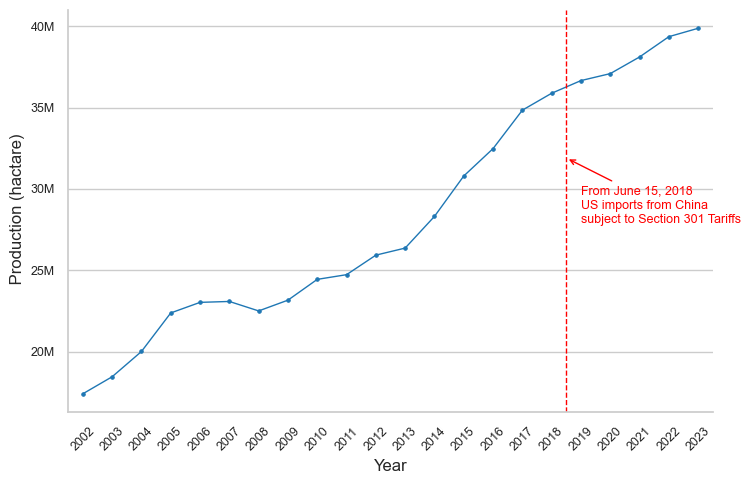

In [230]:
# Create the point plot
g_pro = sns.catplot(
    data=df_pro,
    x="Year",
    y="Soybean_production(h)",
    kind="point",
    height=5,
    aspect=1.5,
    linewidth=1,
    markers='o',
    color="#1f77b4"  # Optional: consistent line color
)

# Format y-axis to millions
g_pro.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Rotate x-tick labels
g_pro.set_xticklabels(rotation=45, fontsize=9)
g_pro.ax.tick_params(axis='y', labelsize=9)

# Axis labels
g_pro.set(xlabel='Year', ylabel=' Production (hactare)')

# Titles and layout
# g_pro.ax.set_title("Soybean Trend with Section 301 Tariff Event", fontsize=14, fontweight='bold', pad=20)

# Add vertical line for June 15, 2018 event (aligned with 2018 on x-axis)
g_pro.ax.axvline(x=16.5, color='red', linestyle='--', linewidth=1)

# Add annotation
g_pro.ax.annotate(
    "From June 15, 2018\nUS imports from China\nsubject to Section 301 Tariffs",
    xy=(16.5, df_pro['Soybean_production(h)'].max()*0.8),
    xytext=(17, df_pro['Soybean_production(h)'].max()*.70),
    arrowprops=dict(arrowstyle='->', color='red', lw=1),
    fontsize=9,
    color='red',
    ha='left'
)

# Tight layout and show
plt.tight_layout()
plt.show()

In [231]:
df_forest_loss = pd.read_csv('/Users/mustakahmad/Downloads/Forest loss in natural forest in Brazil/loss_natural_forest__ha.csv')
# df_forest_loss.iloc[20:40,:]
natural_forest_loss = df_forest_loss[df_forest_loss['sbtn_natural_forests__class']=='Natural Forest']
non_natural_forest_loss = df_forest_loss [df_forest_loss['sbtn_natural_forests__class'] == 'Non-Natural Forest']
natural_forest_loss.rename(columns={'umd_tree_cover_loss__year':'Year','umd_tree_cover_loss__ha': 'natural_forest_loss (h)'},inplace = True)
non_natural_forest_loss.rename(columns={'umd_tree_cover_loss__year':'Year','umd_tree_cover_loss__ha': 'non_natural_forest_loss (h)'},inplace = True)
non_natural_forest_loss

/var/folders/xr/46f3krnx74l44f0hfc6qykt80000gn/T/ipykernel_27082/4044225236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_forest_loss.rename(columns={'umd_tree_cover_loss__year':'Year','umd_tree_cover_loss__ha': 'natural_forest_loss (h)'},inplace = True)
/var/folders/xr/46f3krnx74l44f0hfc6qykt80000gn/T/ipykernel_27082/4044225236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_natural_forest_loss.rename(columns={'umd_tree_cover_loss__year':'Year','umd_tree_cover_loss__ha': 'non_natural_forest_loss (h)'},inplace = True)


,iso,sbtn_natural_forests__class,Year,non_natural_forest_loss (h),gfw_gross_emissions_co2e_all_gases__mg
24,BRA,Non-Natural Forest,2001,164365.475920,5.297130e+07
25,BRA,Non-Natural Forest,2002,197440.569126,7.256368e+07
26,BRA,Non-Natural Forest,2003,167506.642505,6.394094e+07
27,BRA,Non-Natural Forest,2004,205744.636884,8.640405e+07
28,BRA,Non-Natural Forest,2005,211778.276359,9.470620e+07
29,BRA,Non-Natural Forest,2006,210762.251677,9.856564e+07
30,BRA,Non-Natural Forest,2007,198753.081060,9.840396e+07
31,BRA,Non-Natural Forest,2008,192356.340990,1.025406e+08
32,BRA,Non-Natural Forest,2009,174094.701508,9.899904e+07
33,BRA,Non-Natural Forest,2010,231091.900284,1.355611e+08


In [232]:
df_combined['Year'] = pd.to_numeric(df_combined['Year'], errors='coerce')
df_FAO['Year'] = pd.to_numeric(df_FAO['Year'], errors='coerce')
df_pro['Year'] = pd.to_numeric(df_pro['Year'], errors='coerce')
df_usda['Year'] = pd.to_numeric(df_usda['Year'], errors='coerce')

In [233]:
df_climate = pd.read_excel('/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/tariff_war/raw_data/climate_exchange.xlsx',sheet_name= 'Sheet1')
df_climate

,Year,Hurs,pr,tas,forest_loss_PA (h),forest_loss_SC (h),exchange_rate
0,2002,76.92,1788.89,25.47,3.143427e+06,57244.81214,2.920363
1,2003,76.84,1794.61,25.48,2.934752e+06,38064.14357,3.077475
2,2004,76.82,1813.79,25.47,3.472617e+06,53831.41993,2.925119
3,2005,76.84,1839.55,25.46,3.079034e+06,43682.54115,2.434390
4,2006,76.85,1864.67,25.45,2.479103e+06,49569.95585,2.175327
5,2007,76.83,1881.89,25.44,2.189813e+06,44518.44518,1.947058
6,2008,76.74,1883.94,25.45,2.056895e+06,49943.75147,1.833767
7,2009,76.56,1866.25,25.48,1.441226e+06,59765.36948,1.999428
8,2010,76.32,1833.89,25.53,2.140928e+06,52354.93528,1.759227
9,2011,76.06,1793.99,25.59,1.487049e+06,31408.87160,1.672829


In [234]:
# Step 1: Merge df_combined and df_FAO on 'Year'
df_temp = pd.merge(
    df_combined[['Year', 'Trade_value_brazil_china']],
    df_FAO[['Year', 'soy_production(ton)']],
    on='Year',
    how='right'
)

df_temp = pd.merge(
    df_temp, 
    df_pro[['Year','Soybean_production(h)']],
    on = 'Year',
    how = 'right'
    )

# Step 2: Merge the result with df_usda on 'Year'
df_temp = pd.merge(
    df_temp,
    df_usda[['Year', 'Export_Usa_china_MT']],
    on='Year',
    how='right'
)

df_temp = pd.merge(
    df_temp,
    natural_forest_loss[['Year', 'natural_forest_loss (h)']],
    on = 'Year',
    how = 'right'
)

df_temp = pd.merge(
    df_climate,
    df_temp,
    on = 'Year',
    how = 'left'
)

df_merged = pd.merge(
    df_temp,
    non_natural_forest_loss[['Year', 'non_natural_forest_loss (h)']],
    on = 'Year',
    how = 'right'
)
# Display the merged DataFrame
df_merged

,Year,Hurs,pr,tas,forest_loss_PA (h),forest_loss_SC (h),exchange_rate,Trade_value_brazil_china,soy_production(ton),Soybean_production(h),Export_Usa_china_MT,natural_forest_loss (h),non_natural_forest_loss (h)
0,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164365.475920
1,2002,76.92,1788.89,25.47,3.143427e+06,57244.81214,2.920363,8.234461e+08,5.087559e+07,17415884.985622,4861427.0,5.920312e+05,197440.569126
2,2003,76.84,1794.61,25.48,2.934752e+06,38064.14357,3.077475,1.313073e+09,6.745433e+07,18462322.816439,11112116.0,5.413787e+05,167506.642505
3,2004,76.82,1813.79,25.47,3.472617e+06,53831.41993,2.925119,1.621736e+09,6.395336e+07,20014251.932837,9402546.0,6.954028e+05,205744.636884
4,2005,76.84,1839.55,25.46,3.079034e+06,43682.54115,2.434390,1.710493e+09,5.567092e+07,22383040.360976,9434308.0,6.365808e+05,211778.276359
5,2006,76.85,1864.67,25.45,2.479103e+06,49569.95585,2.175327,2.428650e+09,5.914898e+07,23032877.857151,10320990.0,6.114023e+05,210762.251677
6,2007,76.83,1881.89,25.44,2.189813e+06,44518.44518,1.947058,2.831861e+09,6.944163e+07,23088422.850953,11771605.0,6.692643e+05,198753.081060
7,2008,76.74,1883.94,25.45,2.056895e+06,49943.75147,1.833767,5.324052e+09,7.974547e+07,22506856.019659,16512163.0,6.109409e+05,192356.340990
8,2009,76.56,1866.25,25.48,1.441226e+06,59765.36948,1.999428,6.342965e+09,7.091479e+07,23168761.696288,22817676.0,5.039815e+05,174094.701508
9,2010,76.32,1833.89,25.53,2.140928e+06,52354.93528,1.759227,7.133441e+09,7.516015e+07,24446205.448701,24313182.0,7.346627e+05,231091.900284


In [235]:
df_merged.columns
df_merged = df_merged[['Year', 'Hurs', 'pr', 'tas',
       'exchange_rate', 'Trade_value_brazil_china', 'soy_production(ton)',
       'Soybean_production(h)', 'Export_Usa_china_MT', 'forest_loss_PA (h)', 'forest_loss_SC (h)',
       'natural_forest_loss (h)', 'non_natural_forest_loss (h)']]
df_merged

,Year,Hurs,pr,tas,exchange_rate,Trade_value_brazil_china,soy_production(ton),Soybean_production(h),Export_Usa_china_MT,forest_loss_PA (h),forest_loss_SC (h),natural_forest_loss (h),non_natural_forest_loss (h)
0,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164365.475920
1,2002,76.92,1788.89,25.47,2.920363,8.234461e+08,5.087559e+07,17415884.985622,4861427.0,3.143427e+06,57244.81214,5.920312e+05,197440.569126
2,2003,76.84,1794.61,25.48,3.077475,1.313073e+09,6.745433e+07,18462322.816439,11112116.0,2.934752e+06,38064.14357,5.413787e+05,167506.642505
3,2004,76.82,1813.79,25.47,2.925119,1.621736e+09,6.395336e+07,20014251.932837,9402546.0,3.472617e+06,53831.41993,6.954028e+05,205744.636884
4,2005,76.84,1839.55,25.46,2.434390,1.710493e+09,5.567092e+07,22383040.360976,9434308.0,3.079034e+06,43682.54115,6.365808e+05,211778.276359
5,2006,76.85,1864.67,25.45,2.175327,2.428650e+09,5.914898e+07,23032877.857151,10320990.0,2.479103e+06,49569.95585,6.114023e+05,210762.251677
6,2007,76.83,1881.89,25.44,1.947058,2.831861e+09,6.944163e+07,23088422.850953,11771605.0,2.189813e+06,44518.44518,6.692643e+05,198753.081060
7,2008,76.74,1883.94,25.45,1.833767,5.324052e+09,7.974547e+07,22506856.019659,16512163.0,2.056895e+06,49943.75147,6.109409e+05,192356.340990
8,2009,76.56,1866.25,25.48,1.999428,6.342965e+09,7.091479e+07,23168761.696288,22817676.0,1.441226e+06,59765.36948,5.039815e+05,174094.701508
9,2010,76.32,1833.89,25.53,1.759227,7.133441e+09,7.516015e+07,24446205.448701,24313182.0,2.140928e+06,52354.93528,7.346627e+05,231091.900284


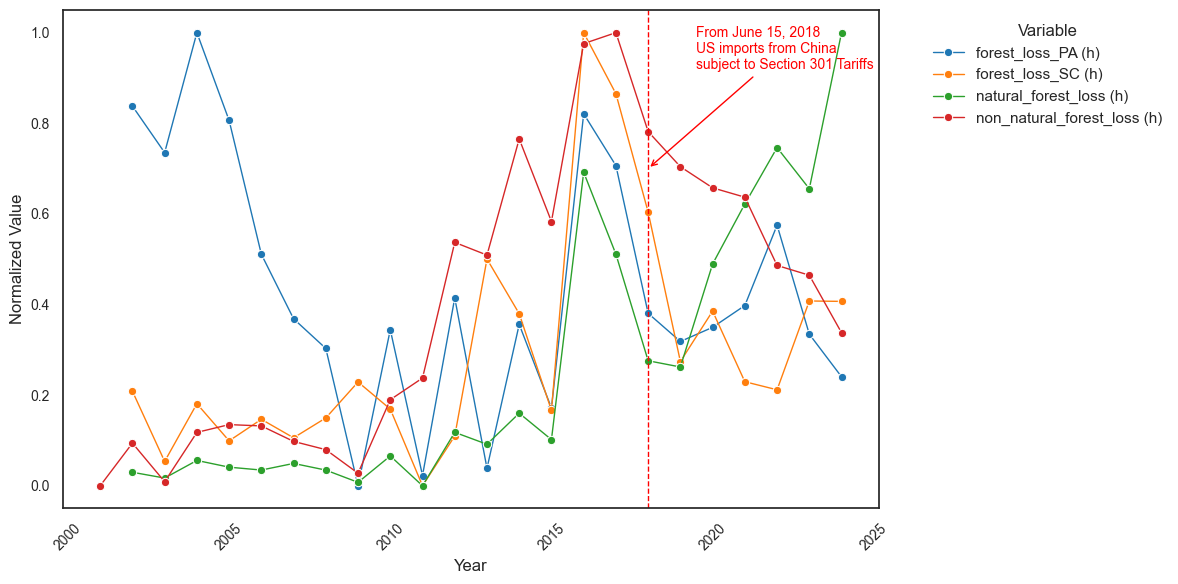

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Normalize values
df_norm = df_merged.copy()
df_norm = df_norm[['Year','forest_loss_PA (h)', 'forest_loss_SC (h)',
       'natural_forest_loss (h)', 'non_natural_forest_loss (h)']]
value_cols = df_norm.columns.drop('Year')
df_norm[value_cols] = df_norm[value_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Reshape for plotting
df_long = pd.melt(df_norm, id_vars='Year', var_name='Variable', value_name='Value')

# Set the plot style
sns.set(style="white", context='notebook')

# Create figure
plt.figure(figsize=(12, 6))

# Use a harmonious color palette
palette = sns.color_palette("Set2", n_colors=df_long['Variable'].nunique())

# Draw smooth lines with markers
sns.lineplot(
    data=df_long,
    x='Year',
    y='Value',
    hue='Variable',
    palette='tab10',
    marker='o',
    linewidth=1,
    markersize=6
)

# Add vertical line for policy event
plt.axvline(x=2018, color='red', linestyle='--', linewidth=1)

# Add annotation
plt.annotate(
    "From June 15, 2018\nUS imports from China\nsubject to Section 301 Tariffs",
    xy=(2018, 0.7),
    xytext=(2019.5, 0.92),
    arrowprops=dict(arrowstyle='->', color='red', lw=1),
    fontsize=10,
    color='red',
    ha='left'
)

# Labels and titles
# plt.title("Trends in Trade, Production, Export, and Forest Loss (Normalized)", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)

# Tick formatting
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Legend
plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Final layout
plt.tight_layout()
plt.show()

In [237]:
# !pip install scipy
from scipy.stats import ttest_ind
import numpy as np

# Separate groups
df_a = df_merged[df_merged['Year'] < 2018]
df_b = df_merged[df_merged['Year'] >= 2018]

# Function to run A/B t-tests
def ab_test(var):
    a = df_a[var].dropna()
    b = df_b[var].dropna()
    stat, pval = ttest_ind(a, b, equal_var=False)  # Welch's t-test
    print(f"\nA/B Test for '{var}':")
    print(f"  Mean A (before 2018): {np.mean(a):,.2f}")
    print(f"  Mean B (2018+):       {np.mean(b):,.2f}")
    print(f"  t-statistic: {stat:.3f},  p-value: {pval:.4f}")
    if pval < 0.05:
        print("  ❗ Significant difference detected.")
    else:
        print("  ✅ No statistically significant difference.")

# Run tests
ab_test('soy_production(ton)')
ab_test('forest_loss_SC (h)')
ab_test('forest_loss_PA (h)')
ab_test('natural_forest_loss (h)')
ab_test('non_natural_forest_loss (h)')


A/B Test for 'soy_production(ton)':
  Mean A (before 2018): 80,660,929.37
  Mean B (2018+):       125,608,843.49
  t-statistic: -5.032,  p-value: 0.0007
  ❗ Significant difference detected.

A/B Test for 'forest_loss_SC (h)':
  Mean A (before 2018): 66,840.25
  Mean B (2018+):       75,975.55
  t-statistic: -0.864,  p-value: 0.3974
  ✅ No statistically significant difference.

A/B Test for 'forest_loss_PA (h)':
  Mean A (before 2018): 2,334,560.09
  Mean B (2018+):       2,194,791.27
  t-statistic: 0.777,  p-value: 0.4456
  ✅ No statistically significant difference.

A/B Test for 'natural_forest_loss (h)':
  Mean A (before 2018): 963,753.57
  Mean B (2018+):       2,766,717.13
  t-statistic: -4.171,  p-value: 0.0026
  ❗ Significant difference detected.

A/B Test for 'non_natural_forest_loss (h)':
  Mean A (before 2018): 281,460.14
  Mean B (2018+):       368,524.90
  t-statistic: -2.539,  p-value: 0.0188
  ❗ Significant difference detected.


In [238]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Copy and clean your DataFrame
df = df_merged.copy()

# ----- Step 1: Setup DiD variables -----
df['treatment'] = 1  # Brazil is always treated
df['post'] = (df['Year'] >= 2018).astype(int)  # Post-treatment period
df['did'] = df['treatment'] * df['post']       # Interaction term

# ----- Step 2: Log-transform forest loss to reduce skew -----
df['log_forest_loss'] = np.log(df['natural_forest_loss (h)'].replace(0, np.nan)).fillna(0)

# ----- Step 3: Define formula -----
did_formula = (
    'log_forest_loss ~ post + treatment + did + '
    'Trade_value_brazil_china + Export_Usa_china_MT + '
    'Q("Soybean_production(h)") + exchange_rate + pr + tas'
)

# ----- Step 4: Run the DiD regression -----
model = smf.ols(formula=did_formula, data=df).fit(cov_type='HC1')

# ----- Step 5: Print results -----
print(model.summary())

# ----- Step 6: Plot average forest loss by year -----
avg_loss = df.groupby('Year')['natural_forest_loss (h)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_loss, x='Year', y='natural_forest_loss (h)', marker='o', linewidth=2, color='forestgreen')

plt.axvline(x=2018, linestyle='--', color='red', label='Tariff Imposed (2018)')
plt.title("Average Annual Forest Loss in Brazil", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Forest Loss (ha)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (/Users/mustakahmad/Library/CloudStorage/OneDrive-purdue.edu/FACAI LAB/Project3_tariff/proj3env/lib/python3.12/site-packages/scipy/_lib/_util.py)